In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit, RepeatedKFold
import numpy as np
from itertools import combinations
import statsmodels.api as sm
import statsmodels.tools as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time
import matplotlib.pyplot as plt
import pprint
import statistics
%matplotlib inline

In [5]:
response = 'rheomix final deg time min'
K_set = 'k20'

In [6]:
file1 = 'Total_model_subset_{}_Kfold_{}.csv'.format(response, K_set)
df_kfold = pd.read_csv(file1)

In [8]:
file1 = 'Total_model_subset_{}_AIC_BIC_AICc.csv'.format(response)
df_AIC = pd.read_csv(file1)

In [9]:
AICc_list = [df_AIC[df_AIC['No_terms'] == i+1]['AICc'].min() for i in range(28)]
AIC_list = [df_AIC[df_AIC['No_terms'] == i+1]['AIC'].min() for i in range(28)]
BIC_list = [df_AIC[df_AIC['No_terms'] == i+1]['BIC'].min() for i in range(28)]
no_terms_list = np.linspace(1,28, 28)

In [11]:
list_kall = list(df_kfold['k20'])

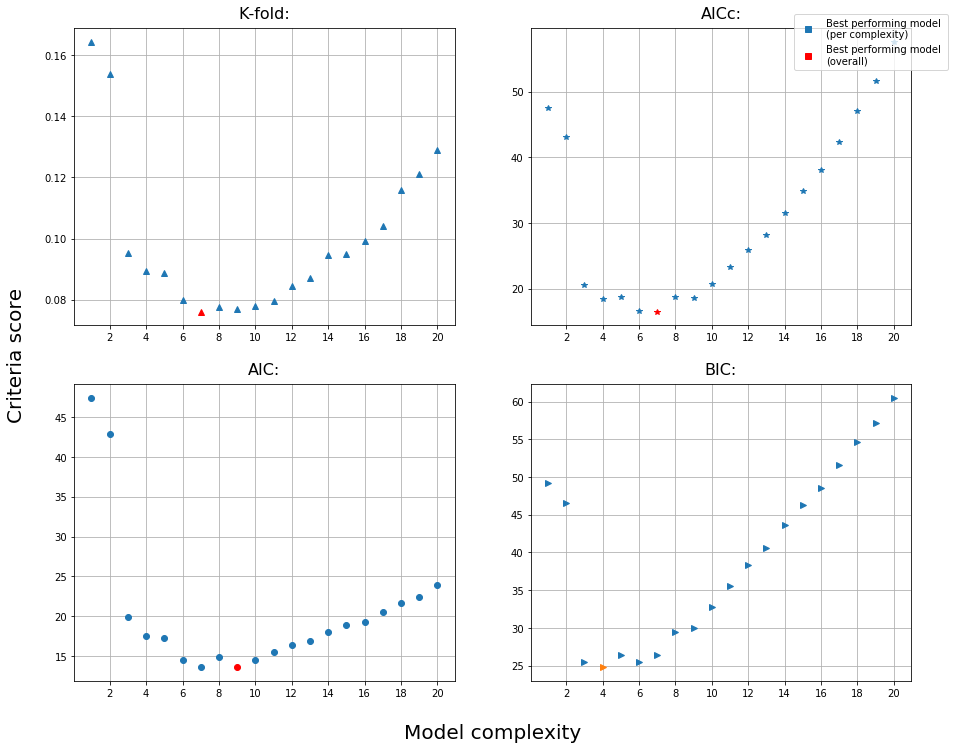

In [12]:
Ylabel = 'Criteria score'
Xlabel = 'Model complexity'

plotVar1label = 'K-fold'
plotVar2label = 'AICc'
plotVar3label = 'AIC'
plotVar4label = 'BIC'

LegendLocation = 'best'
Grid = True
LegendSize = 12
FontSize = 20

fig, ax = plt.subplots(2, 2, sharex=False)


list_k1 = [-i for i in list_kall[:20] if i != max(list_kall)]
list_k2 = [-max(list_kall)]

no_terms_k1 = [i+1 for i in range(len(list_kall[:20])) if list_kall[i] != max(list_kall)]
no_terms_k2 = [i+1 for i in range(len(list_kall[:20])) if list_kall[i] == max(list_kall)]

list_Ac1 = [i for i in AICc_list[:20] if i != min(AICc_list)]
list_Ac2 = [min(AICc_list)]

no_terms_Ac1 = [i+1 for i in range(len(AICc_list[:20])) if AICc_list[i] != min(AICc_list)]
no_terms_Ac2 = [i+1 for i in range(len(AICc_list[:20])) if AICc_list[i] == min(AICc_list)]

list_A1 = [i for i in AIC_list[:20] if i != min(AIC_list)]
list_A2 = [min(AIC_list)]

no_terms_A1 = [i+1 for i in range(len(AIC_list[:20])) if AIC_list[i] != min(AIC_list)]
no_terms_A2 = [i+1 for i in range(len(AIC_list[:20])) if AIC_list[i] == min(AIC_list)]

list_B1 = [i for i in BIC_list[:20] if i != min(BIC_list)]
list_B2 = [min(BIC_list)]

no_terms_B1 = [i+1 for i in range(len(BIC_list[:20])) if BIC_list[i] != min(BIC_list)]
no_terms_B2 = [i+1 for i in range(len(BIC_list[:20])) if BIC_list[i] == min(BIC_list)]

ax[0,0].plot(no_terms_k1, list_k1, "^", label=plotVar1label)
ax[0,0].plot(no_terms_k2, list_k2, "r^", label=plotVar1label)

ax[0,1].plot(no_terms_Ac1, list_Ac1, "*", label=plotVar2label)
ax[0,1].plot(no_terms_Ac2, list_Ac2, "r*", label=plotVar2label)

ax[1,0].plot(no_terms_A1, list_A1, "o", label=plotVar3label)
ax[1,0].plot(no_terms_A2, list_A2, "ro", label=plotVar3label)

ax[1,1].plot(no_terms_B1, list_B1, ">", label=plotVar4label)
ax[1,1].plot(no_terms_B2, list_B2, ">", label=plotVar4label)

# ax[0,0].plot(no_terms_list[:20], [-i for i in list_kall[:20]], "^", label=plotVar1label)
# ax[0,1].plot(no_terms_list[:20], AICc_list[:20], "*", label=plotVar2label)
# ax[1,0].plot(no_terms_list[:20], AIC_list[:20], "o", label=plotVar3label)
# ax[1,1].plot(no_terms_list[:20], BIC_list[:20], ">", label=plotVar4label)


# ax[0].set_title('K-fold:', fontsize=16, pad = 10)
# ax[1].set_title('AICc:', fontsize=16, pad = 10)

ax[0,0].set_title('K-fold:', fontsize=16, pad = 10)
ax[0,1].set_title('AICc:', fontsize=16, pad = 10)
ax[1,0].set_title('AIC:', fontsize=16, pad = 10)
ax[1,1].set_title('BIC:', fontsize=16, pad = 10)


# ax[0].axis([0, 26, 0 , 120])
# ax[1].axis([0, 26, 0 , 0.4])

# plt.xlim([0, 26])

# ax[1,0].axis([0, 26, 0 , 0.15])
# fig.legend(loc='best', numpoints = 1, fontsize=FontSize, prop={'size':LegendSize})
# fig.delaxes(ax[1][1])

# ax[0].set_xticks(no_terms_list[:20])
# ax[0].set_xticks([2*(i+1) for i in range(10)])
# ax[1].set_xticks([2*(i+1) for i in range(10)])

ax[0,0].set_xticks([2*(i+1) for i in range(10)])
ax[0,1].set_xticks([2*(i+1) for i in range(10)])
ax[1,0].set_xticks([2*(i+1) for i in range(10)])
ax[1,1].set_xticks([2*(i+1) for i in range(10)])

fig.set_figheight(12)
fig.set_figwidth(15)
# # plt.legend(loc=1, numpoints = 1, fontsize=FontSize, prop={'size':LegendSize})

# fig.ylabel(Ylabel, fontsize=FontSize)
# # fig.xlabel(Xlabel, fontsize=FontSize)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.ylabel(Ylabel, fontsize=FontSize, labelpad=25)
plt.xlabel(Xlabel, fontsize=FontSize, labelpad=25)
# plt.xlabel(Xlabel)
# # plt.tick_params(axis='x', labelsize=FontSize)
# # plt.tick_params(axis='y', labelsize=FontSize)
# ax[0].grid(zorder = 0)
# ax[1].grid(zorder = 0)
# ax[1,0].grid(zorder = 0)

ax[0,0].grid(zorder = 0)
ax[0,1].grid(zorder = 0)
ax[1,0].grid(zorder = 0)
ax[1,1].grid(zorder = 0)

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# print(lines, labels, lines[6:], labels[6:])
# fig.legend(handles = [plt.plot([],"ro")[0]], labels=labels[6:])

plt.legend(handles = [plt.plot([],"s")[0], plt.plot([],"rs")[0]], labels=['Best performing model \n(per complexity)', 'Best performing model \n(overall)'], bbox_to_anchor=(1.05, 1.03))
# fig.legend(lines, labels)
# fig.legend(handles = [plt.plot([],"ro")], labels= ['TEST'])
# fig.tight_layout()
# fig.tight_layout()
fig.savefig('Model_complex_compare_rfdt.png', bbox_inches = "tight")